# PROJECT: IMPACT OF GENDER AND ADVERTISEMENT ON SALES OF MALE CONDOMS IN UGANDA

## VARIABLE DICTIONARY

### ABOUT THE PROJECT: 

This project is an RCT conducted in Uganda. We are looking at impact of gender and treatment on sales. Randomisation is done at branches of the NGO we are working with. In this data analysis, i describe the data, explore and graphically explain some key relations.


PE_name--            Name of Peer Educator (Condom Seller)

ela_member --        ELA member or not (1- yes, 0-no)

age --               Age of buyer

return_buyer --      Returned customer or not

comfortselling--     Comfort selling (1-5)

location --          Location of sales

comments --           Comments by seller

day --               Day

month --             Month

year  --             Year

branch1 --           Branch   0-Bulenga	
                            1-Kasangati	
                            2-Nansana	
                            3-Wakiso	
                            4-kasubi	
                            5-kisaasi	
                            6-kyengera

treatment  --         0-Control
                    1-Pleasure
                    2-Protection
                    
age1 --               age of buyer

revenue_ugx  --       Revenue

condom_packs --       Packs sold

brand  --             0-O condom
                    1-Trust
                    
pleasure_treat --     Pleasure treatment dummy

protect_treat --      Protection treatment dummy

friend  --            friend dummy

acquaintance --       acquaintance dummy

family  --            family dummy

partner --            partner dummy

stranger --           stranger dummy

myself  --            self dummy

age_sq  --            age squared

log_sales --          log of sales

name_pe  --           name of PE

female_pe --          sex of PE
                       1-Female
                       0-Male

female_buyer --       Sex of buyer
                    1-Female
                    0-Male

fem_pe_pleasure --    Interaction var pleasure dummy and sex of seller

fem_pe_protect --     Interaction var protection dummy and sex of seller

treat_month  --       treatment month dummy
                    1-Post intervention
                    0-Pre intervention

T   --                T brand dummy

O  --                 O brand dummy

sales  --             sales

control_treat --      control arm dummy

relation --           relation with seller

sales_permonth --     sales per month per seller

log_monthlysales --   log sales per month per seller

sales_perbranch--     sales per month per branch

fem_pe_buyer_fem --   Female seller female buyer

fem_pe_buyer_m--      Female seller male buyer

m_pe_buyer_fem --     Male seller female buyer
    

In [ ]:
# STEP 1: Importing the data modules needed for the analysis, plotting and showing results

import numpy as np
import scipy.stats as stats
from scipy.stats.stats import pearsonr
import pandas as pd

#plotting modules

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [138]:
#STEP 2: Loading the data into the notebook. This data has condom sales
df = pd.read_stata('/Users/meyhar/Desktop/meyhar/Data/Condom_sales_2.dta')

In [120]:
#STEP 3: Describing the data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1003
Data columns (total 47 columns):
PE_name             1004 non-null object
ela_member          1004 non-null category
age                 1003 non-null float64
return_buyer        1000 non-null category
comfortselling      995 non-null category
location            1004 non-null object
comments            1004 non-null object
day                 1004 non-null float32
month               1004 non-null category
year                1004 non-null float32
branch1             1004 non-null category
treatment           1004 non-null category
age1                1004 non-null category
revenue_ugx         1001 non-null float64
condom_packs        1001 non-null float32
brand               995 non-null category
pleasure_treat      710 non-null category
protect_treat       583 non-null category
friend              1004 non-null float32
acquaintance        1004 non-null float32
family              1004 non-null float32
partner 

In [121]:
#Describing data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1003.0,23.126620,12.444404,1.000000,NaN,NaN,NaN,327.000000
day,1004.0,13.952191,7.768820,1.000000,8.0,14.0,20.0,31.000000
year,1004.0,2016.000000,0.000000,2016.000000,2016.0,2016.0,2016.0,2016.000000
revenue_ugx,1001.0,1103.576424,544.525111,80.000000,NaN,NaN,NaN,5400.000000
condom_packs,1001.0,1.463537,0.943879,1.000000,NaN,NaN,NaN,9.000000
friend,1004.0,0.578685,0.494014,0.000000,0.0,1.0,1.0,1.000000
acquaintance,1004.0,0.104582,0.306167,0.000000,0.0,0.0,0.0,1.000000
family,1004.0,0.127490,0.333686,0.000000,0.0,0.0,0.0,1.000000
partner,1004.0,0.048805,0.215566,0.000000,0.0,0.0,0.0,1.000000
stranger,1004.0,0.123506,0.329180,0.000000,0.0,0.0,0.0,1.000000


In [122]:
df.head()

,PE_name,ela_member,age,return_buyer,comfortselling,location,comments,day,month,year,...,sales_permonth,log_monthlysales,sales_perbranch,fem_pe_buyer_fem,fem_pe_buyer_m,m_pe_buyer_fem,pe_name,Name,Age,_merge
0,Aturinda Obedi,No,30.0,No,Very uncomfortable,HOUSE,that we need to bring anoother apart from these,12.0,July,2016.0,...,7000.0,8.853665,48000.0,0.0,0.0,0.0,Aturinda Obedi,Aturinda Obed,24.0,matched (3)
1,Aturinda Obedi,No,17.0,No,Very uncomfortable,FOOTBALL FIELD,that is agood idea to the society,17.0,July,2016.0,...,7000.0,8.853665,48000.0,0.0,0.0,0.0,Aturinda Obedi,Aturinda Obed,24.0,matched (3)
2,Aturinda Obedi,No,25.0,No,Very uncomfortable,HOUSE,cheap compared to those in the pharmacy,9.0,July,2016.0,...,7000.0,8.853665,48000.0,0.0,0.0,1.0,Aturinda Obedi,Aturinda Obed,24.0,matched (3)
3,Aturinda Obedi,No,18.0,No,Very uncomfortable,HOUSE,confortable,17.0,May,2016.0,...,1000.0,6.907755,56600.0,0.0,0.0,0.0,Aturinda Obedi,Aturinda Obed,24.0,matched (3)
4,Aturinda Obedi,No,23.0,No,Very uncomfortable,HOUSE,approachable,10.0,August,2016.0,...,1000.0,6.907755,41200.0,0.0,0.0,0.0,Aturinda Obedi,Aturinda Obed,24.0,matched (3)


In [123]:
df.tail().T

,999,1000,1001,1002,1003
PE_name,,,,,
ela_member,No,No,No,No,Yes
age,24,21,21,40,18
return_buyer,No,No,No,No,No
comfortselling,Very uncomfortable,Very comfortable,Uncomfortable,Comfortable,Neutral
location,FOOTBALL FIELD,Trading Center- Kasangati,ROAD,YOUTH SEMINAR,HOUSE
comments,very happy,Easy sales,surprised of the price,if they are fake I will take you to jail,happily sold
day,4,30,7,15,9
month,July,August,June,August,May
year,2016,2016,2016,2016,2016


In [124]:
#STEP 4: Looking at missing values

#Values missing are primarily due to random nature of RCT. 
#Values missing in pleasure and protect dummy are missing because of the creation of the dummy which takes 1 when treatment1 and 0 for control and missing values for treatment2. 

df.isnull().sum()

PE_name               0
ela_member            0
age                   1
return_buyer          4
comfortselling        9
location              0
comments              0
day                   0
month                 0
year                  0
branch1               0
treatment             0
age1                  0
revenue_ugx           3
condom_packs          3
brand                 9
pleasure_treat      294
protect_treat       421
friend                0
acquaintance          0
family                0
partner               0
stranger              0
myself                0
age_sq                1
log_sales             3
name_pe               9
female_pe             0
female_buyer          4
fem_pe_pleasure     294
fem_pe_protect      421
treat_month           0
T                     0
O                     0
sales                11
control_treat         0
relation              0
sales_permonth        0
log_monthlysales      1
sales_perbranch       0
fem_pe_buyer_fem      4
fem_pe_buyer_m  

In [125]:
#STEP 5:

#Summarizing and cleaning key varaiables

#Average condom packs sold by every seller is 1.4
#Average sales per branch is 44382.86
#Average age of buyer is 23.12

print df['age'].mean()
print df['sales_perbranch'].mean()
print df['condom_packs'].mean()

23.1266201396
44382.8671875
1.46353650093


In [126]:
#Sales per branch
#sales per gender of seller
#packs sold per branch
#packs sold per gender of seller
#sales per treatment
#packs sold per treatment

df.groupby(['branch1'])['sales_permonth'].mean().reset_index()


,branch1,sales_permonth
0,Bulenga,8988.095703
1,Kasangati,15951.724609
2,Nansana,6207.626953
3,Wakiso,6218.310059
4,kasubi,10502.041016
5,kisaasi,9331.460938
6,kyengera,4580.198242


In [127]:
df.groupby(['female_pe'])['sales_permonth'].mean().reset_index()

,female_pe,sales_permonth
0,0.0,7131.624023
1,1.0,9856.716797


In [128]:

df.groupby(['branch1'])['condom_packs'].mean().reset_index()

,branch1,condom_packs
0,Bulenga,1.607143
1,Kasangati,2.350877
2,Nansana,1.063559
3,Wakiso,1.514084
4,kasubi,1.734694
5,kisaasi,1.135593
6,kyengera,1.386139


In [129]:
df.groupby(['female_pe'])['condom_packs'].mean().reset_index()

,female_pe,condom_packs
0,0.0,1.362661
1,1.0,1.551402


In [130]:
mean_sales = df.groupby(['branch1'])['sales_permonth'].mean()
mean_sales

branch1
Bulenga       8988.095703
Kasangati    15951.724609
Nansana       6207.626953
Wakiso        6218.310059
kasubi       10502.041016
kisaasi       9331.460938
kyengera      4580.198242
Name: sales_permonth, dtype: float32

In [131]:
#Creating index for age of buyers to have categories

bins = [10, 15, 20, 25, 30, 35, 40, 45]
group_names = ['B/w Ten and Fifteen', 'B/w Fifteen and Twenty', 'B/w twenty and Twenty_five', 'B/w twenty_five and Thrity', 'B/w thirty and Thirty_five', 'B/w thrity five and Forty', 'B/w Forty and Forty_five']

age_category = pd.cut(df['age'], bins, labels = group_names)
df['age_category'] = pd.cut(df['age'], bins, labels = group_names)


In [132]:
#Mean sales in terms of packs of condom sold by branch

mean_sales = 0
for branch in 'branch1':
    mean_sales = df.groupby(['branch1'])['condom_packs'].mean()
mean_sales

branch1
Bulenga      1.607143
Kasangati    2.350877
Nansana      1.063559
Wakiso       1.514084
kasubi       1.734694
kisaasi      1.135593
kyengera     1.386139
Name: condom_packs, dtype: float32

In [133]:
df.groupby(['age_category'],sort=True)

In [134]:
df.groupby(['name_pe'],sort=True)

In [135]:
#sorting sales by individual seller and gender in Descending order


df.groupby(['pe_name', 'female_pe'],sort=True)[['log_monthlysales']].mean().sort_values(by=['log_monthlysales'], ascending=False).reset_index()

,pe_name,female_pe,log_monthlysales
0,Nabuzaale Josephine,1.0,10.774403
1,Kizza Annet,1.0,10.082744
2,Nassiwa Esther,1.0,9.643597
3,Ssekeba Anwal Jowab,0.0,9.462990
4,Kokuhirwo Moreen,1.0,9.400484
5,Maovu John Canaan,0.0,9.337610
6,Nakalema Hellen,1.0,9.230964
7,Nyadoi Eunice,1.0,9.210340
8,Namala Peruth,1.0,9.210340
9,Irene,1.0,9.176055


In [136]:
df.loc[df['log_monthlysales'].isnull()]

#One missing value of log monthly sales per seller

,PE_name,ela_member,age,return_buyer,comfortselling,location,comments,day,month,year,...,log_monthlysales,sales_perbranch,fem_pe_buyer_fem,fem_pe_buyer_m,m_pe_buyer_fem,pe_name,Name,Age,_merge,age_category
55,Demba Aloyzious,No,14.0,NaN,NaN,,,15.0,June,2016.0,...,NaN,74400.0,0.0,0.0,0.0,Demba Aloyzious,Isabirye Maxson,23.0,matched (3),B/w Ten and Fifteen


In [23]:
import os, sys

In [24]:
#Renaming variables age of buyer, age of seller, comfortselling

df.rename(columns={'comfortselling':'comfort_selling',
                  'age':'age_buyer',
                  'Age': 'age_seller',
                  'age1':'age_range_buyer'}, inplace=True)

In [25]:
#Since we have names encoded, we can delete the string variable of names
df = df.drop('Name', axis=1)

In [26]:
df = df.drop('PE_name', axis=1)

In [27]:
#STEP 6: TABULATION AND COMPARISON TO EXPLORE RELATIONSHIP BETWEEN VARIABLES

# Sales tabulation analysis

#How many sales of each brand of condom
#How many sales done by males or females
#how many sales done by branch
#number of sales by relationship
#number of sales by treatment 
#number of sales by treatment and gender

df.brand.value_counts()


T condom    525
O condom    470
Name: brand, dtype: int64

In [28]:
df.female_pe.value_counts()

1.0    536
0.0    468
Name: female_pe, dtype: int64

In [29]:
df.branch1.value_counts()

Nansana      236
kisaasi      178
kasubi       147
Wakiso       142
Kasangati    116
kyengera     101
Bulenga       84
Name: branch1, dtype: int64

In [30]:
df.relation.value_counts()

Friend           588
Family member    128
Stranger         124
Acquaintance     105
Partner           49
Myself            10
Name: relation, dtype: int64

In [31]:
df.treatment.value_counts()

Pleasure treatment      421
Protection treatment    294
Control                 289
Name: treatment, dtype: int64

In [32]:
df.groupby(['female_pe', 'treatment'])['condom_packs'].mean()

female_pe  treatment           
0.0        Control                 1.370690
           Pleasure treatment      1.213333
           Protection treatment    1.624000
1.0        Control                 1.797688
           Pleasure treatment      1.290816
           Protection treatment    1.602410
Name: condom_packs, dtype: float32

In [33]:
#Correlation between age of seller and age of buyer

age_cor = ['age_buyer','age_seller']
df[age_cor].corr()

,age_buyer,age_seller
age_buyer,1.000000,-0.012605
age_seller,-0.012605,1.000000


In [35]:
df['condom_packs'].describe()

count    1001.000000
mean        1.463537
std         0.943879
min         1.000000
25%              NaN
50%              NaN
75%              NaN
max         9.000000
Name: condom_packs, dtype: float64

In [114]:
#Create unique id for each transaction
import uuid
import random


def uniqueid(df):
    seed = random.random()*100
    while True:
       yield seed
       seed += 1
print uniqueid


<function uniqueid at 0x1203d0398>


In [59]:
## Define a function that returns the highest sales made by any branch

def top_brnch(df, num=6, column='sales_perbranch'):
    return df.sort_values(by=column)[-num:]
top_brnch(df, num=3).T

,155,696,474
ela_member,No,Yes,No
age_buyer,22,23,19
return_buyer,Yes,No,Yes
comfort_selling,Very uncomfortable,Very uncomfortable,Very uncomfortable
location,CLUB,FOOTBALL FIELD,FIELD
comments,give for free,lower the price,excellent
day,5,12,4
month,July,July,July
year,2016,2016,2016
branch1,kasubi,kasubi,kasubi


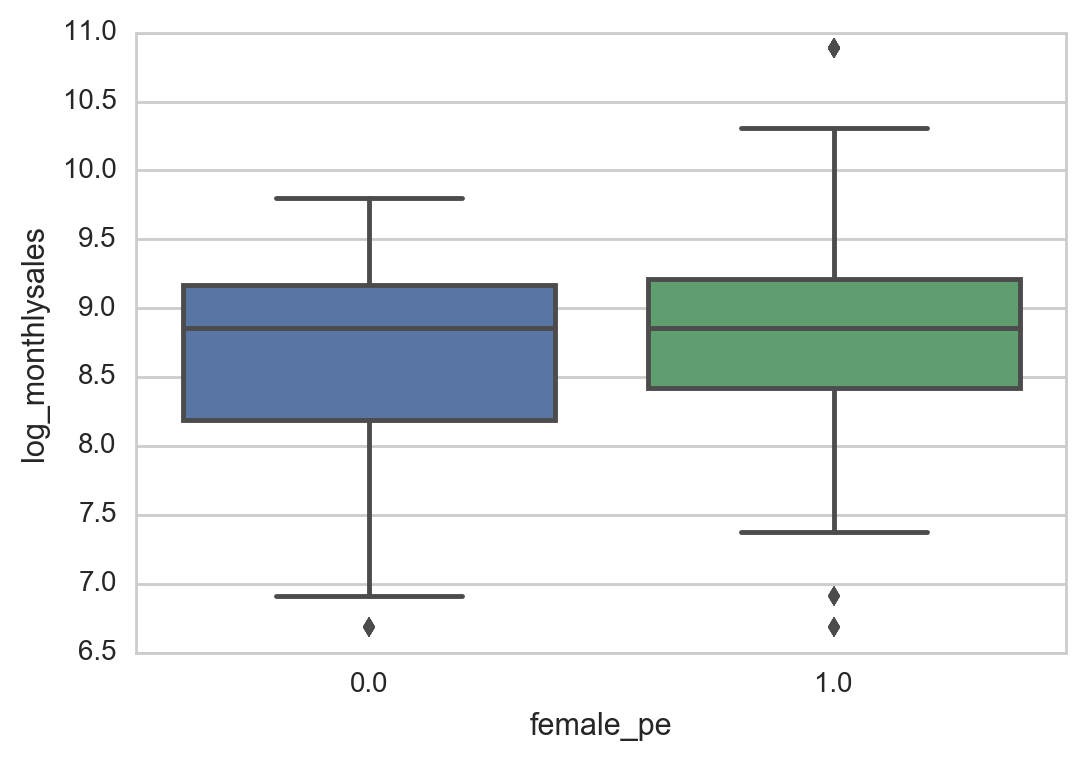

In [38]:
#STEP 7: VISUALIZATION OF KEY VARIABLES


# comparing monthly sales of females and males

sns.boxplot(x="female_pe", y="log_monthlysales", data=df)

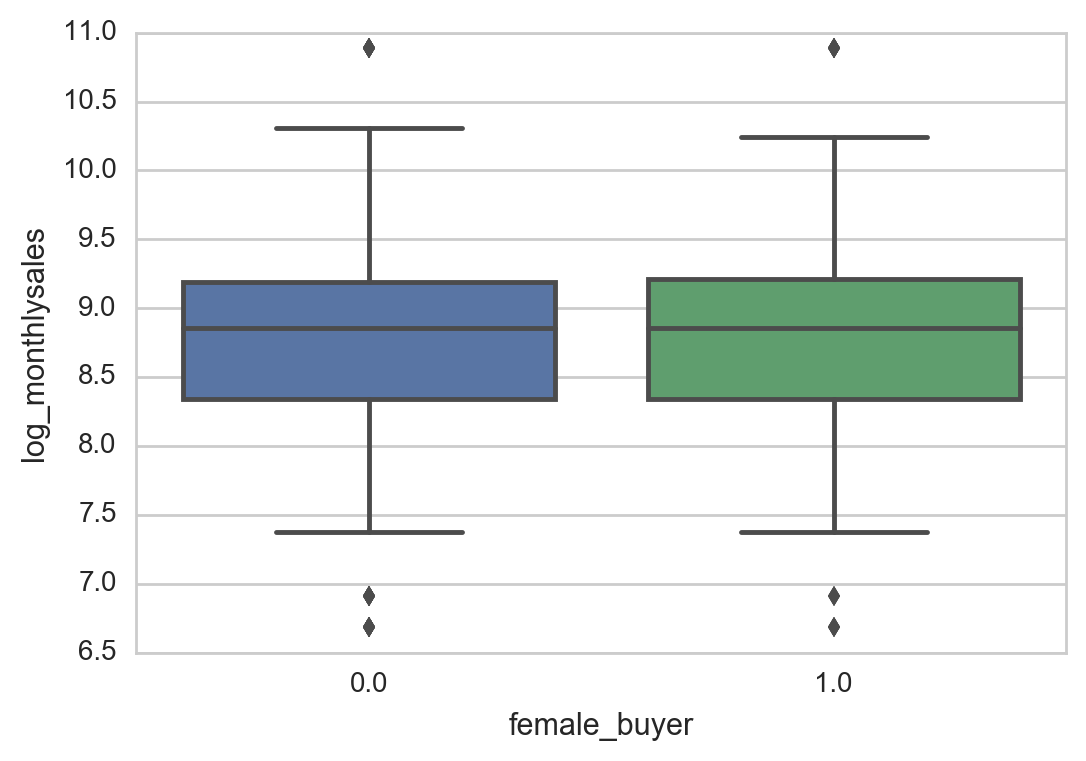

In [39]:
sns.boxplot(x="female_buyer", y="log_monthlysales", data=df)

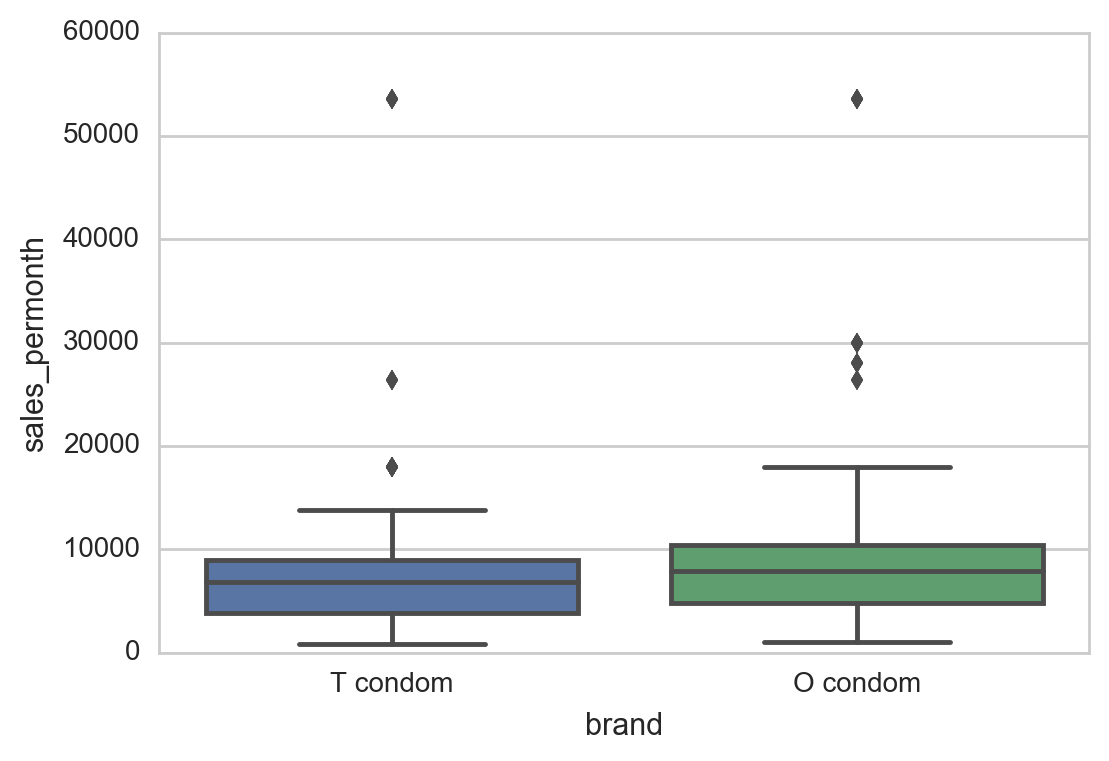

In [40]:
# comparing which brand sold more
sns.boxplot(x="brand", y="sales_permonth", data=df)

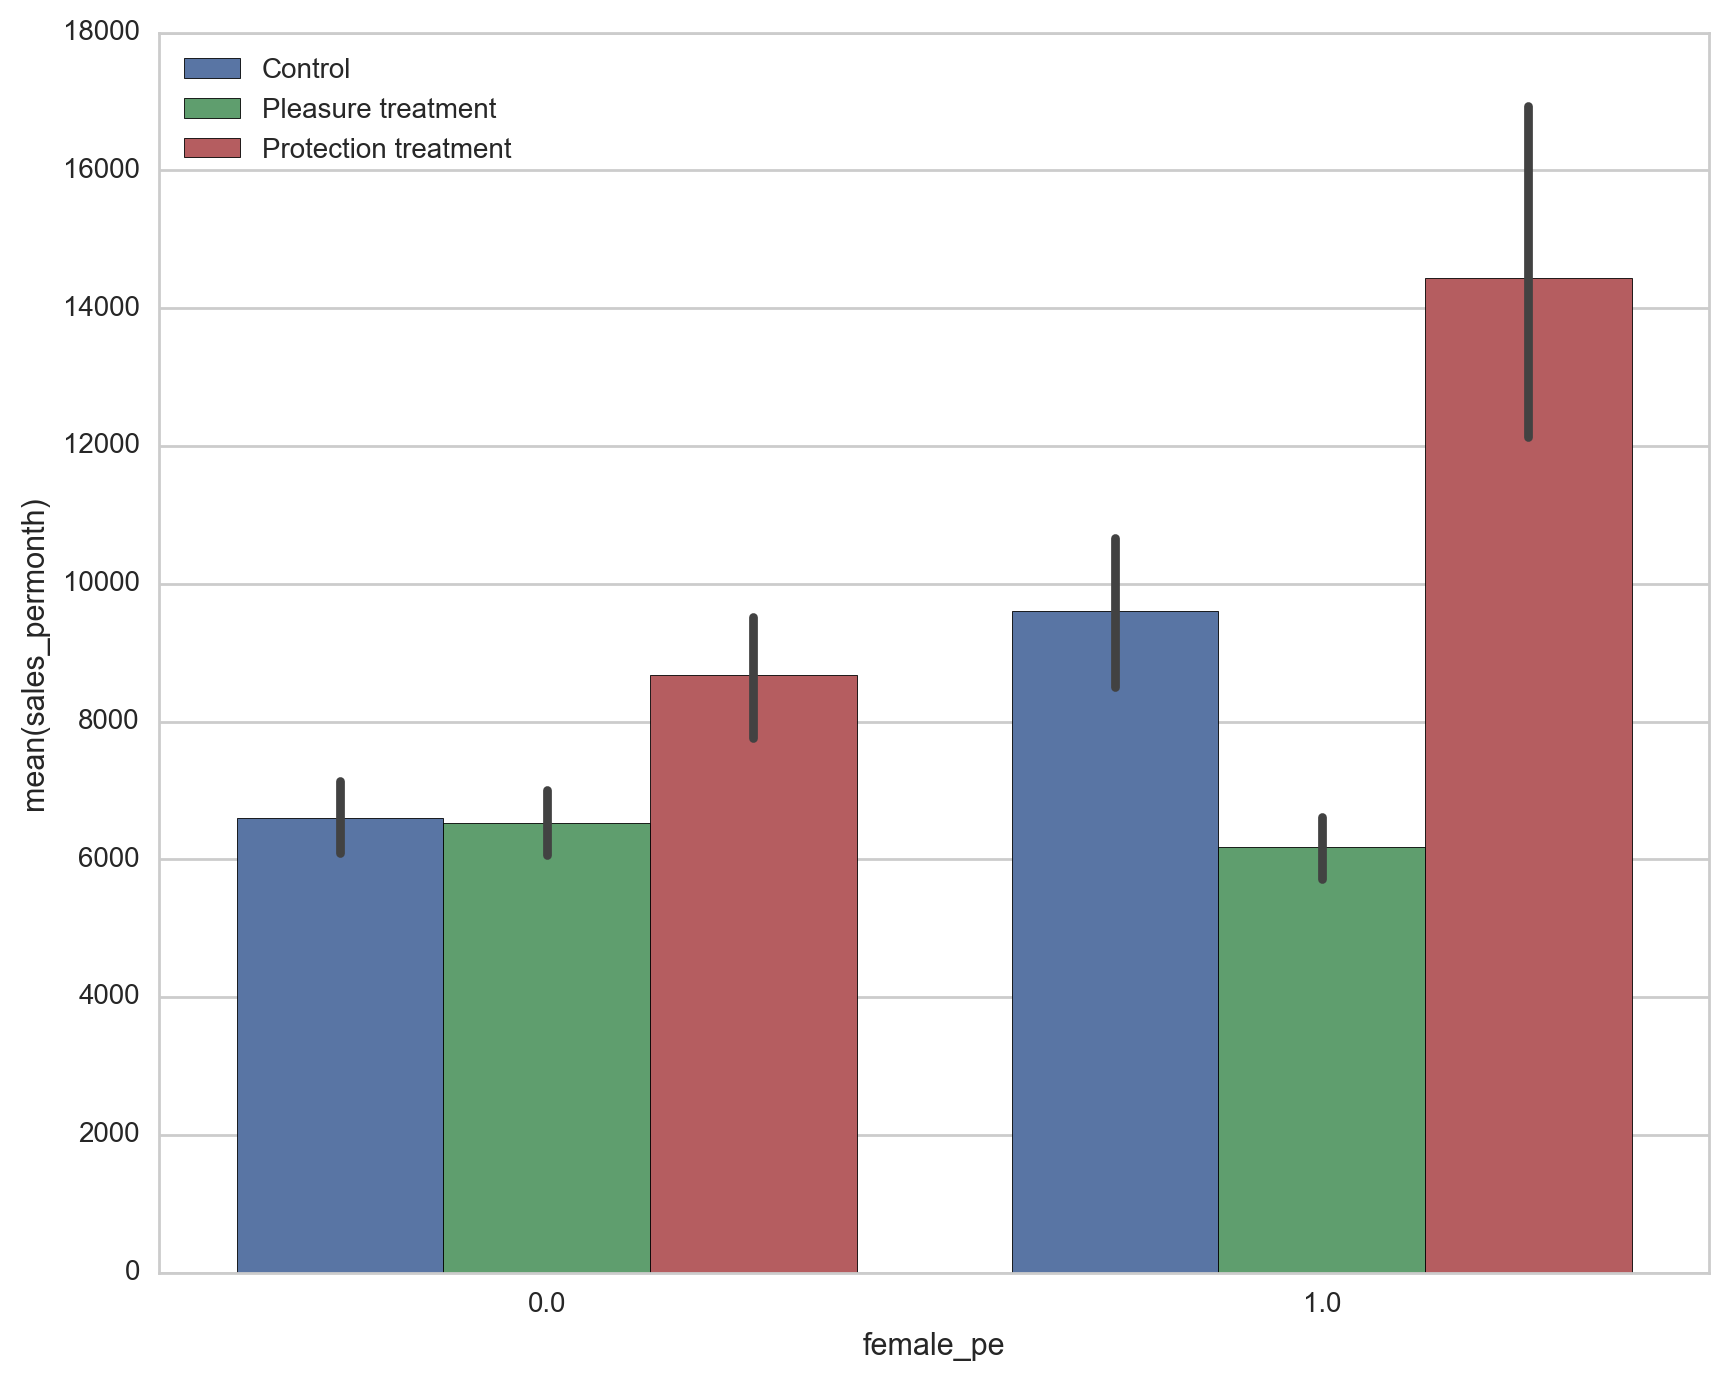

In [41]:
##Key figure of project: comparing monthly sales of males and females across treatment and control arms

fig = plt.figure(figsize=(10,8))

sns.barplot(x="female_pe", y="sales_permonth", hue="treatment", data=df)
plt.legend(loc='upper left')

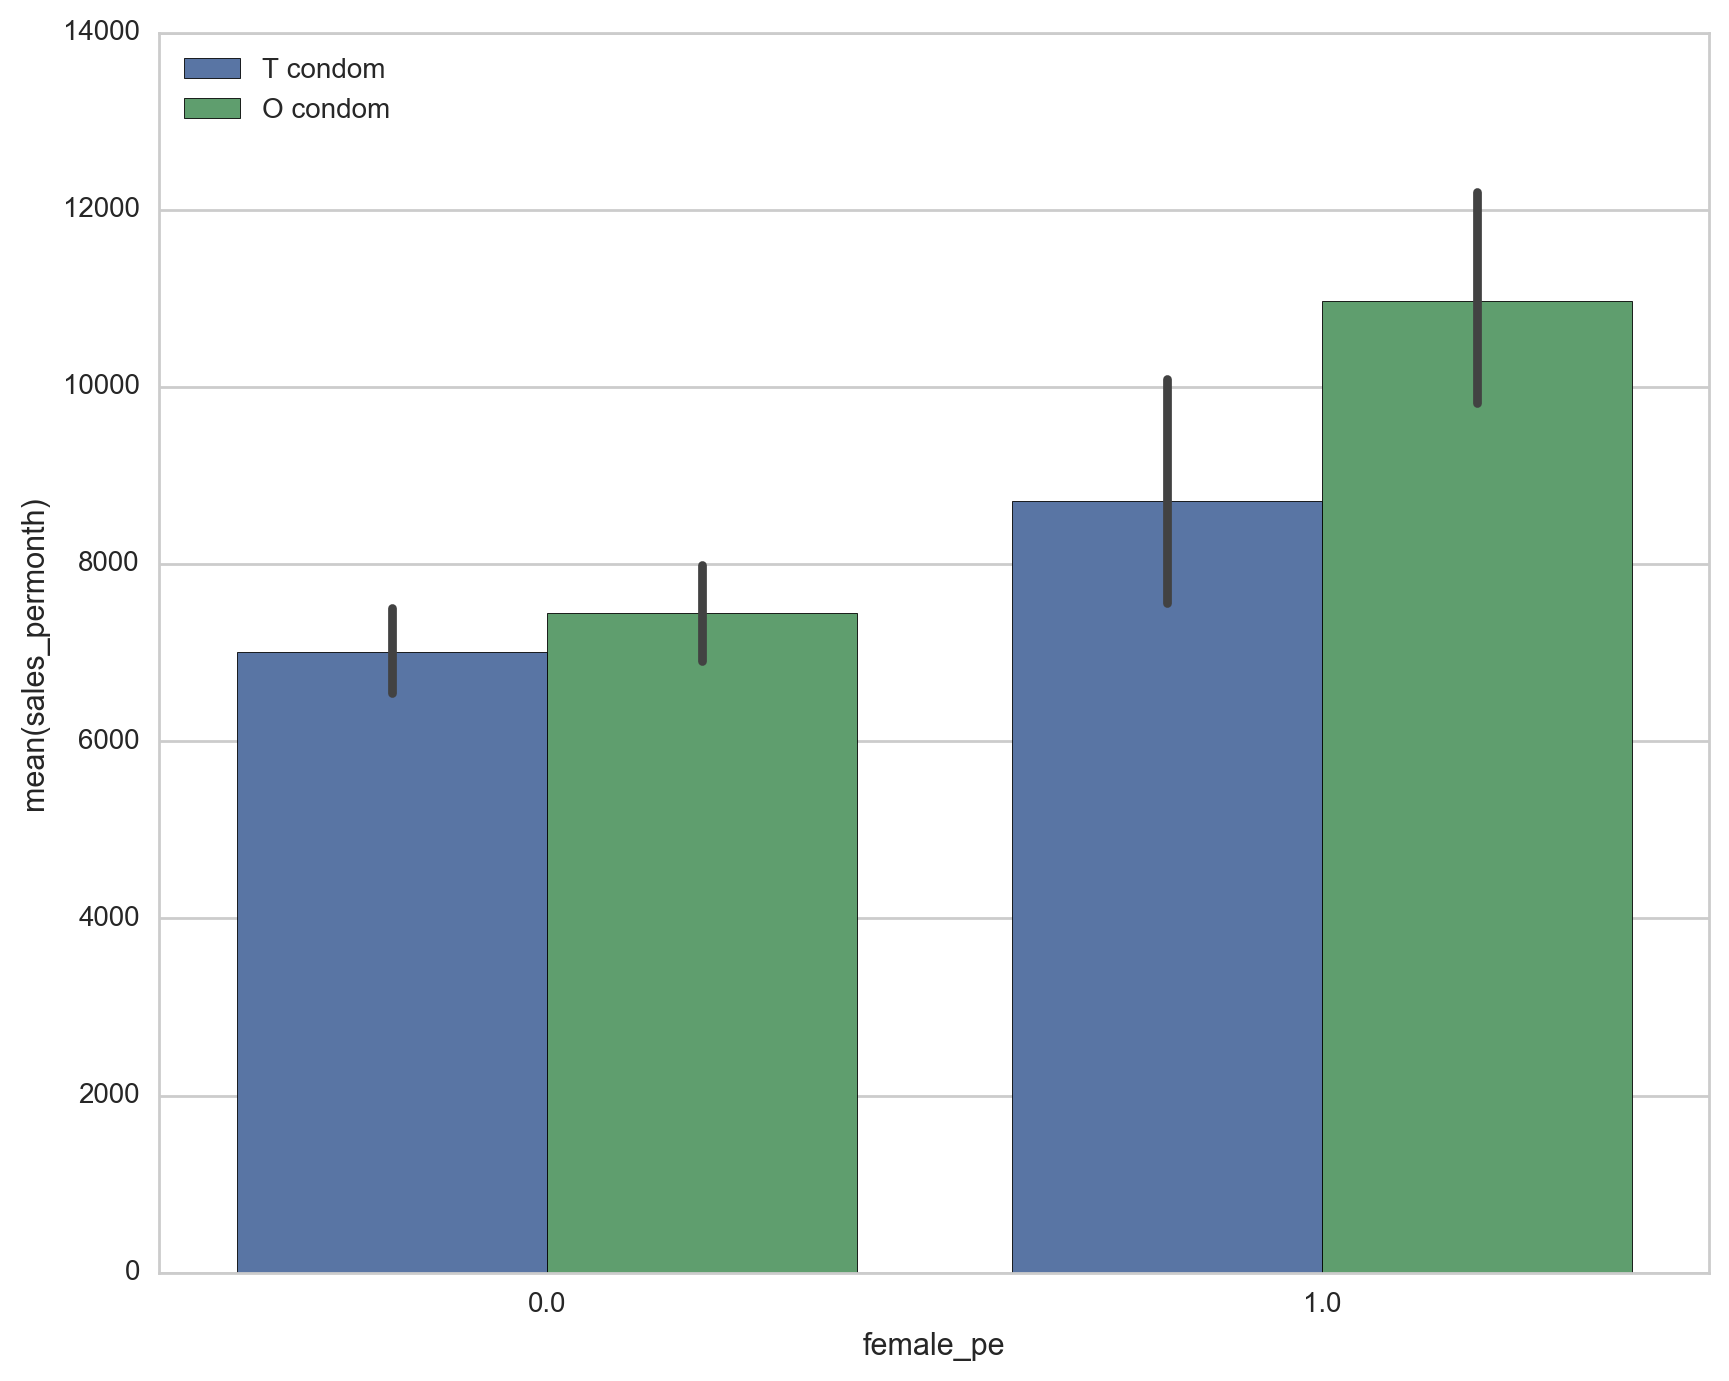

In [42]:
fig = plt.figure(figsize=(10,8))

sns.barplot(x="female_pe", y="sales_permonth", hue="brand", data=df)
plt.legend(loc='upper left')

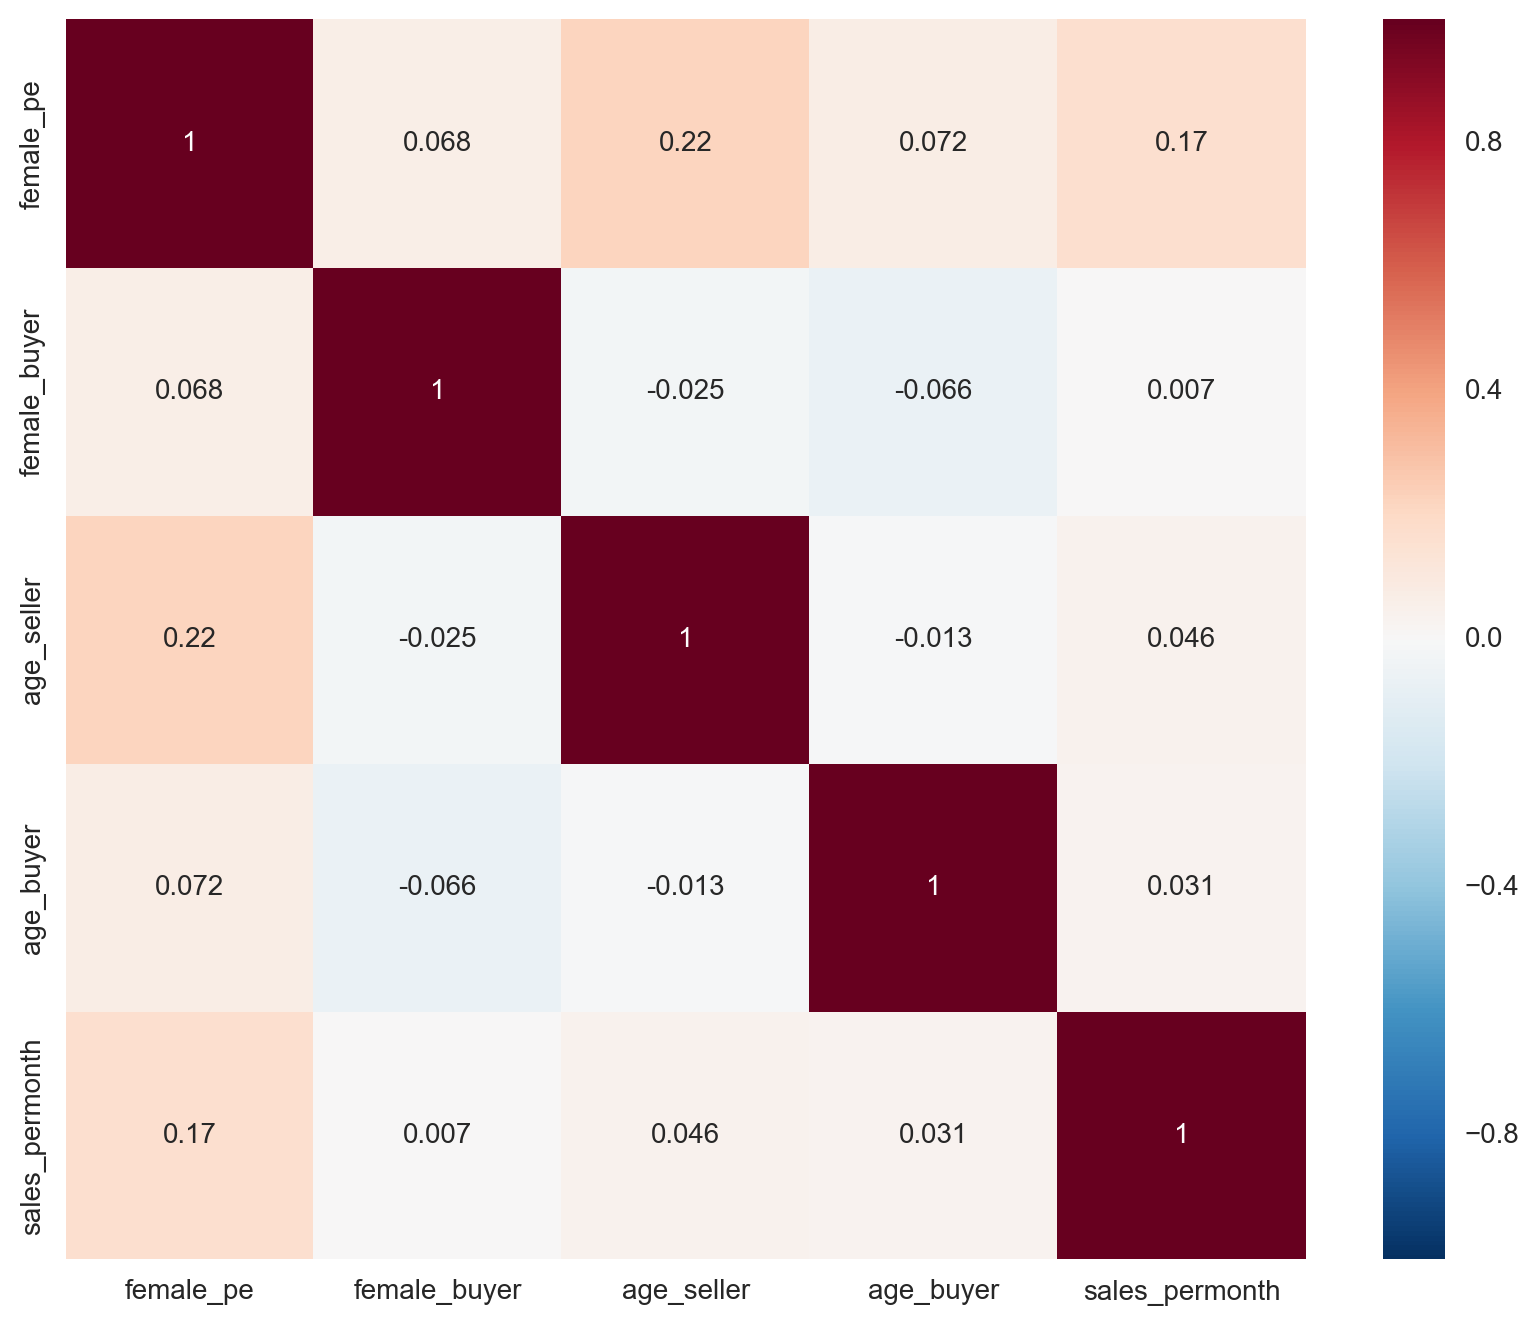

In [43]:
#STEP 8: OVERALL CORRELATION MATRIX

#To see correlation between sex of seller and sex of buyer, sex of buyer and treatment, sex of buyer 
# No strong correlation between any key variables

fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(df[['female_pe', 'female_buyer', 'age_seller', 'age_buyer', 'pleasure_treat', 'protect_treat','sales_permonth']].corr(),annot=True, ax=ax)
plt.show()



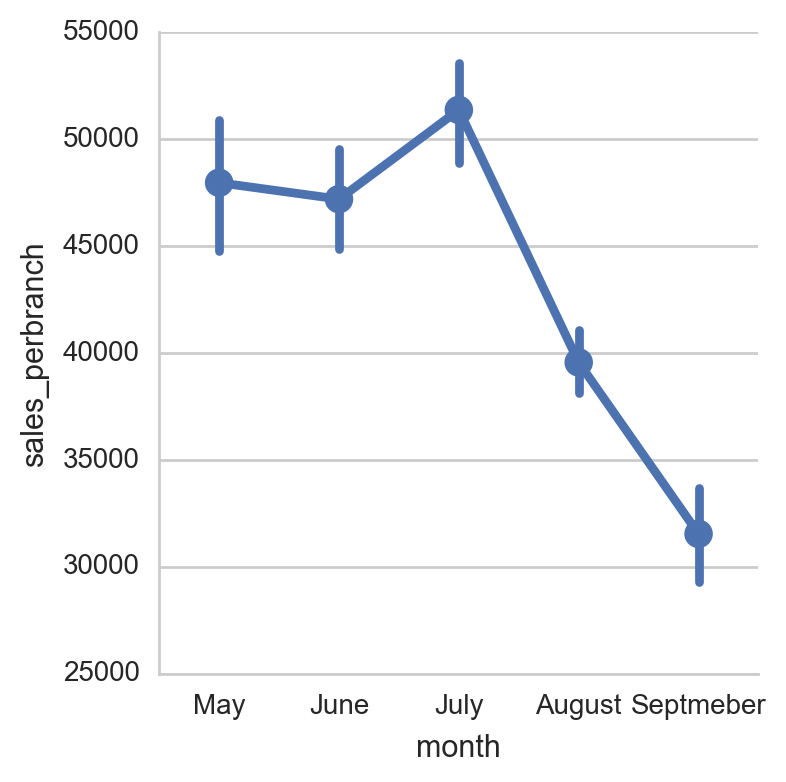

In [44]:

sns.factorplot(x="month", y="sales_perbranch", data=df)

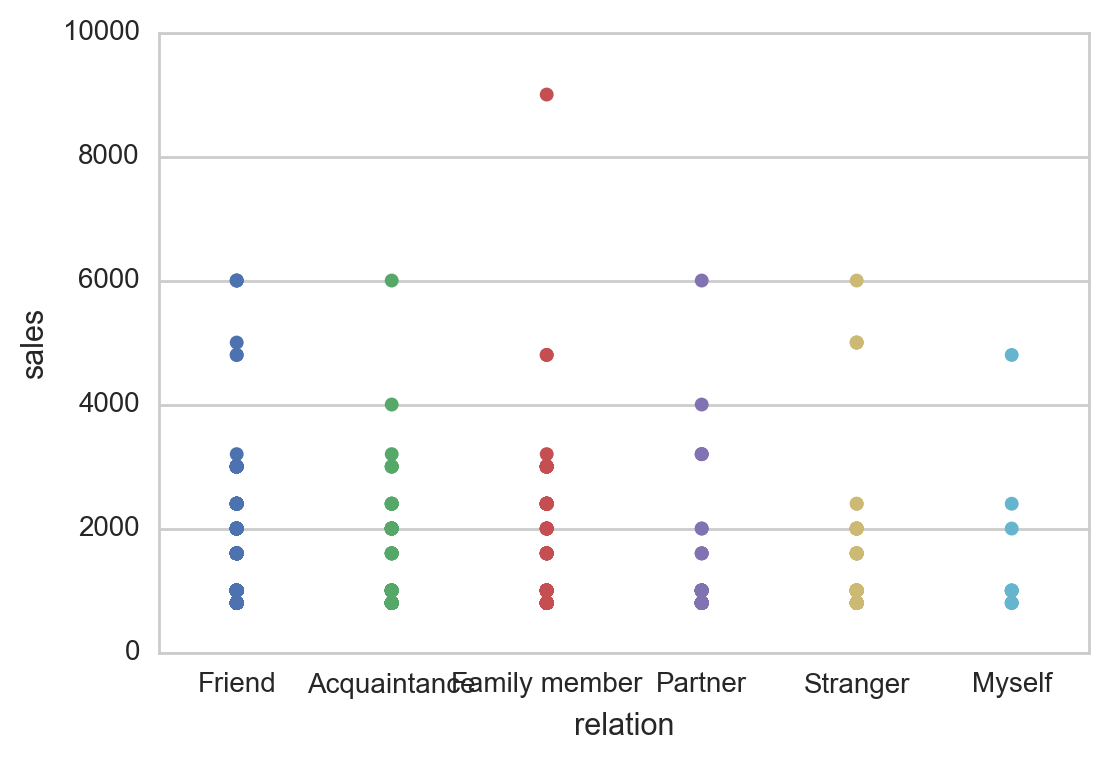

In [45]:
#Did they sell more to people they know?

sns.stripplot(x="relation", y="sales", data=df)

In [ ]:
# Relabelling sex of seller and sex of buyer for next graph

In [49]:
 df['female_pe']=df['female_pe'].apply(lambda x: 'Female' if x ==1 else 'Male' if x==0 else x)


In [50]:
 df['female_buyer']=df['female_buyer'].apply(lambda x: 'Female' if x ==1 else 'Male' if x==0 else x)


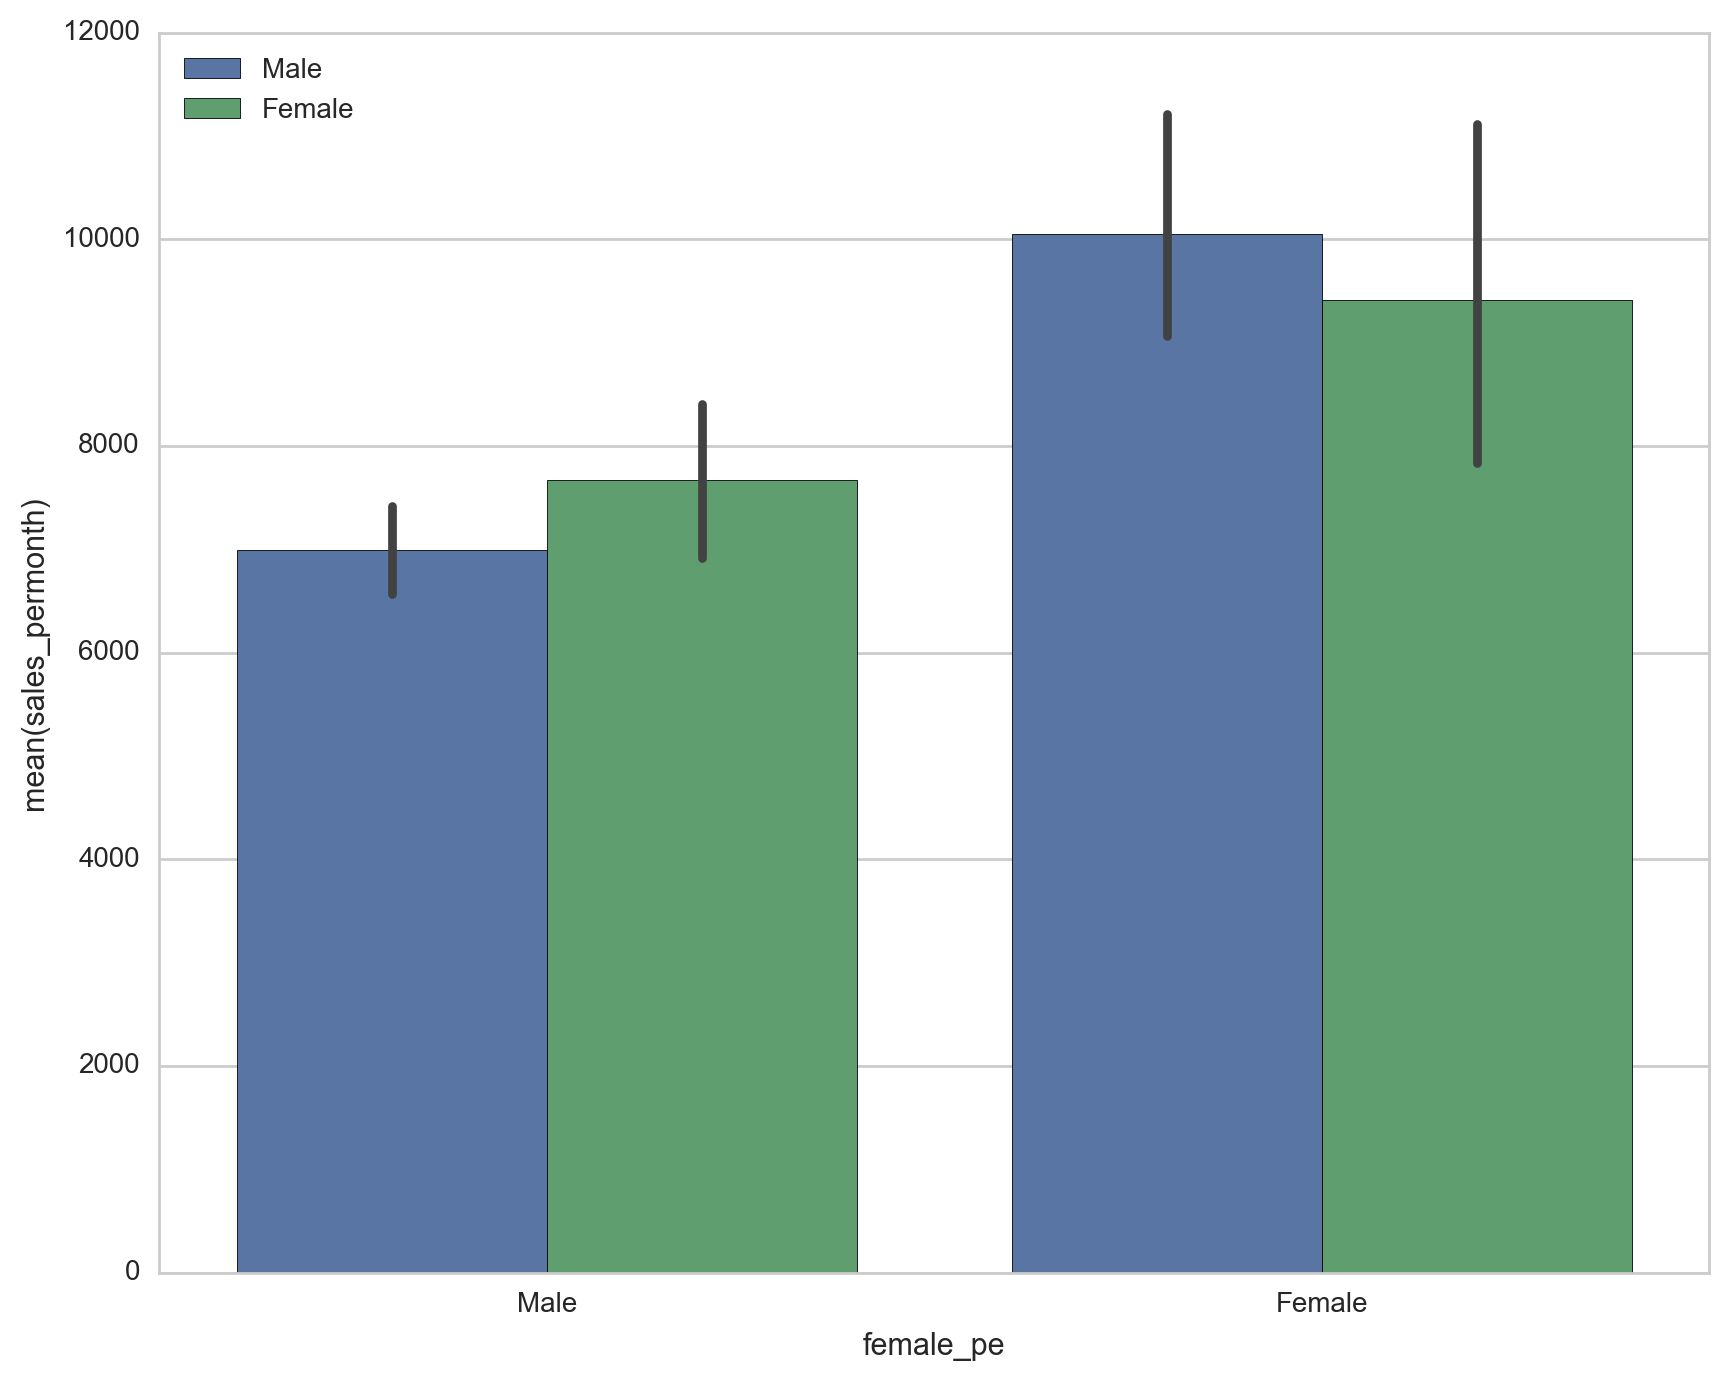

In [51]:
fig = plt.figure(figsize=(10,8))

sns.barplot(x="female_pe", y="sales_permonth", hue="female_buyer", data=df)
plt.legend(loc='upper left')

# REPORT

## Some interesting findings 

### 1. Sex of Seller:

We see that females sell significantly more than men. A further regression analysis with more covariates will elaborate whether the nature of this relation is causal or merely correlational. 

### 2. Brand of condom:

We see that brand O sells a lot more than brand T. It is to be noted that the sellers were given an equal amount of both. This shows that in addition to the advertising and gender of seller, branding has a role too in condom usage.

### 3. Advertising:

This RCT has 2 treatment arms:
##### Pleasure advertising, and protective/prevention advertising :
3.1 Though overall we see that post intervention of advertisement, monthly sales per seller decrease, but we see that females in the protection arm sell most.

3.2 The most interesting part is that females in the pleasure treatment, sell a lot more post intervention than pre intervention.

### 4. Relationship with buyer:

We would assume that it is easiest to sell to known sources like friends, family etc. We do not see a significant difference in the sales to a friend compared to less known sources. This could hint at the fact that maybe relationship is not a contributing factor when in an effort to increase access of contraceptives to youth.

### 5. All figures are per seller:

All the sales figures presented in the analysis above are in per seller terms. This accounts for the fact that female sellers are over represented in the sample. 

### 6. Cross Gender selling:

We see that males sell a lot more to females and females sell a lot more to males. This is really interesting to observe because one of the objectives of the study is to see same gender selling. One would 

### 7. Discussion points:

7.1 To get the most accurate measure of outcome, should sales be measured as total sales or average sales

7.2 Even though we can see the dynamics of females selling and treatment assignment on selling, overall sales post intervention goes down. What does that indicate about advertising impact on consumer market for condoms?

7.3 We have one month's sale data pre intervention and 5 months sales data post intervention. How do we correct for sample size variability?
